# Geofences for dockless shared vehicles
This notebook documents work around creating a listing of polygons within which scooters are required to behave differently, namely disable parking or disuade riding.

## Parks
The first area that we want to look at are parks.  We'll use Portland's Open Data Portal to get the official geometries of parks in Portland

In [157]:
import geopandas as gpd
pdx_parks = gpd.read_file('https://opendata.arcgis.com/datasets/9eef54196eaa4d12b54e9bc40e70ff09_35.geojson')
pdx_parks = pdx_parks[['NAME', 'geometry']].rename(index=str, columns={'NAME': 'name'})

## Combining everything
Now, we need to combine all the datasets we've created into one no parking zone dataset

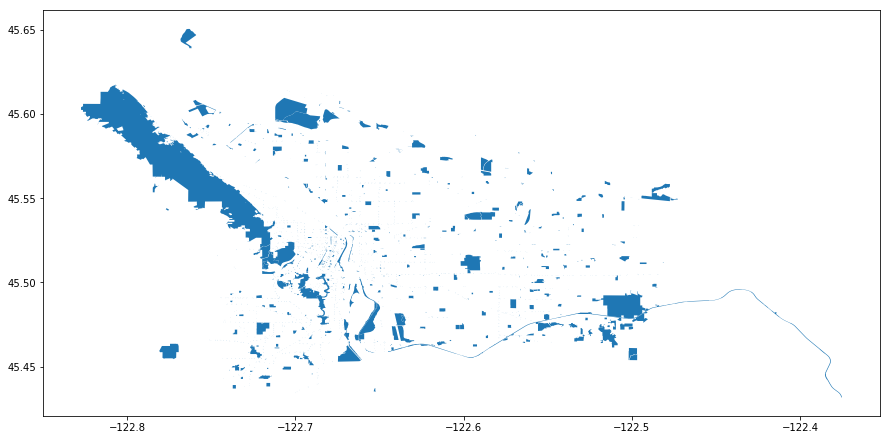

In [234]:
combined_datasets = pd.concat([pdx_parks])
combined_datasets.plot(figsize=(15,15))

Since this is a non-uniform set of geometries, we can't use geopandas' to_file, so we will work around that

In [235]:
with open('../.data/no_riding_zones.geojson', 'w') as f:
    f.write(combined_datasets.to_json())